
# Introduction to the project:
Stroke is a medical condition that can lead to the death of a person. It’s a severe condition and if treated on time we can save one’s life and treat them well. There can be n number of factors that can lead to strokes and in this project blog, we will try to analyze a few of them. I have taken the dataset from Kaggle. It has 12 variables and 5110 observations.

# Importing Libraries:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline # used to show diagrams even if plt.show()is not called.
from matplotlib import cm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif

UsageError: unrecognized arguments: # used to show diagrams even if plt.show()is not called.


# Importing Dataset:

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#Below code gives the names of columns in dataset 
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
#Below code will give information about each columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#Below code will give information about the numeric variables 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
#Below code will give details of object variables
data.describe(include=object).transpose()

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


# Exploratory Data Analysis(EDA):

In [7]:
#Below code will give the number of null values in data
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#calculating mean of male and female
male_mean_bmi = data[data["gender"]=="Male"]["bmi"].mean()
female_mean_bmi = data[data["gender"]=="Female"]["bmi"].mean()
print("male mean bmi: %1.5f " %male_mean_bmi)
print("female mean bmi: %1.5f " %female_mean_bmi)

male mean bmi: 28.64794 
female mean bmi: 29.06576 


In [9]:
#fill missing value with mean value
data.loc[(data["gender"]=="Male") & (data["bmi"].isnull()), "bmi"]= male_mean_bmi
data.loc[(data["gender"]=="Female") & (data["bmi"].isnull()), "bmi"]= female_mean_bmi

In [10]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Gender :
We will see genderwise comparison for stroke rate.

In [11]:
# Below code will help to give us information about it's unique values and count of each value.
print('Unique values:\n',data['gender'].unique())


Unique values:
 ['Male' 'Female' 'Other']


In [12]:
#prints values of gender column
print('Value Counts:\n',data['gender'].value_counts())

Value Counts:
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


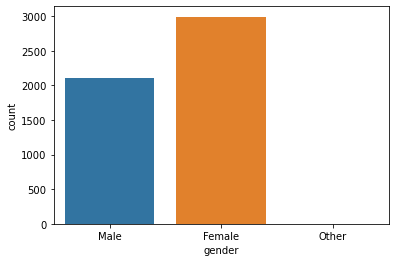

In [13]:
# this code will give graphical representation of unique values of gender
sns.countplot(data['gender'], label="Count")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

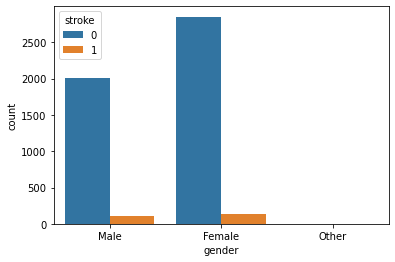

In [14]:
# This plot will help to analyze how gender will affect chances of stroke
sns.countplot(data=data,x='gender',hue='stroke')

#Observations:

Here we can see that dataset is imbalanced. we can conclude that there is not much difference in the stroke rate on the basis of gender

# Age :
we will see how age impacts stroke rate.

In [15]:
data['age'].nunique()
# Returns number of unique values in this attribute

104

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

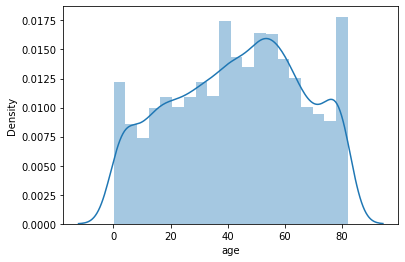

In [16]:
sns.distplot(data.age)
# This will plot a  univariate distribution of age

<AxesSubplot:xlabel='stroke', ylabel='age'>

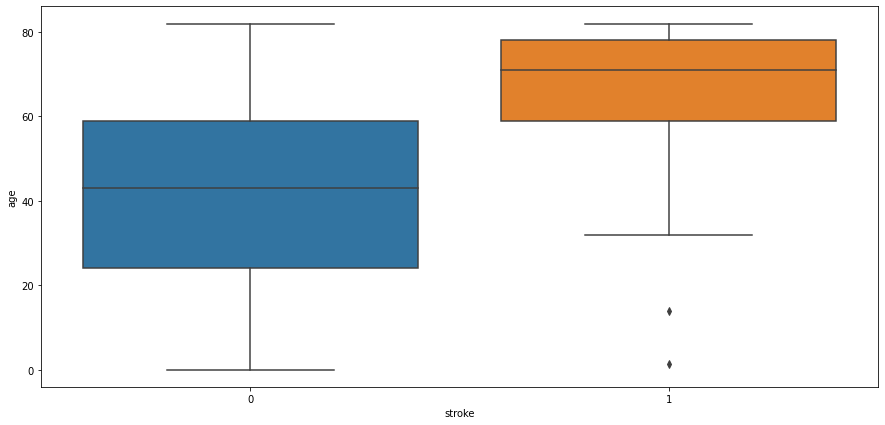

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

#Observation:

People aged more than 60 years tend to have a stroke. Some outliers can be seen as people below age 20 
are having a stroke it might be possible that it’s valid data as stroke also depends on our eating and living habits.
Another observation is people not having strokes also consist of people age > 60 years.

# Hypertension :
Hypertension is a condition when a person has high blood pressure. Hypertension might result in a stroke. We will see how it goes.

In [18]:
data['hypertension'].nunique()
# Returns number of unique values in this attribute

2

<AxesSubplot:xlabel='hypertension', ylabel='count'>

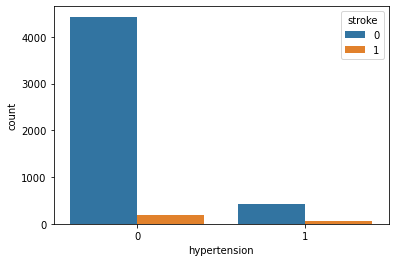

In [19]:
sns.countplot(data=data,x='hypertension',hue='stroke')

<AxesSubplot:xlabel='stroke', ylabel='hypertension'>

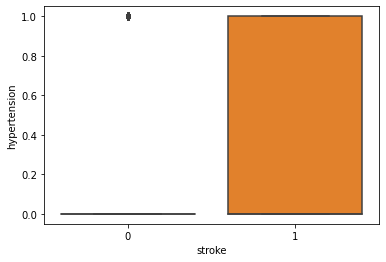

In [20]:
#plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='hypertension')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

#Observation:

Well, hypertension is rare in young people and common in aged people.
Hypertension can cause a stroke. Based on our data picture is not that clear for hypertension.
It has quite little data on patients having hypertension.

# Ever_married :
This attribute will tell us whether or not the patient was ever married. Let’s see how will it affect the chances of having a stroke.

In [21]:
data['ever_married'].nunique()
# Returns number of unique values in this attribute

2

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


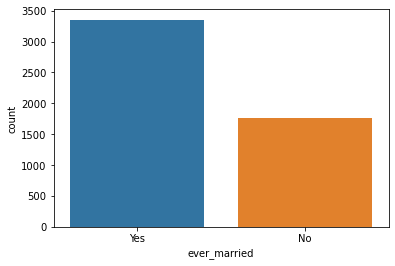

In [22]:
sns.countplot(data['ever_married'], label="Count")
plt.show()

<AxesSubplot:xlabel='ever_married', ylabel='count'>

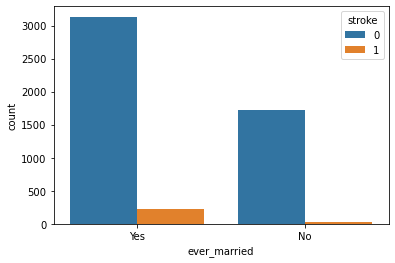

In [23]:
sns.countplot(data=data,x='ever_married',hue='stroke')

<AxesSubplot:xlabel='stroke', ylabel='ever_married'>

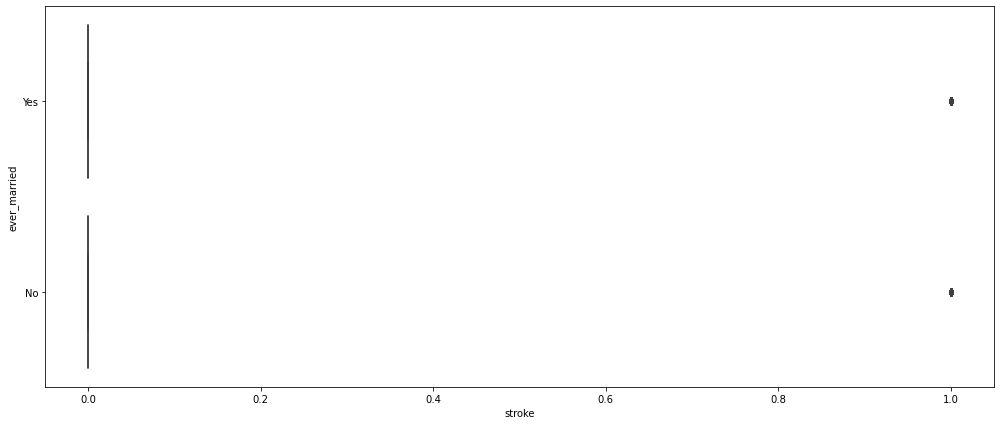

In [24]:
plt.figure(figsize=(17,7))
sns.boxplot(data=data,x='stroke',y='ever_married')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

#Observation:

People who are married have a higher stroke rate.

# Work_Type:
This attribute contains data about what kind of work does the patient. Different kinds of work have different kinds of problems and challenges which can be the possible reason for excitement, thrill, stress, etc. Stress is never good for health, let’s see how this variable can affect the chances of having a stroke.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


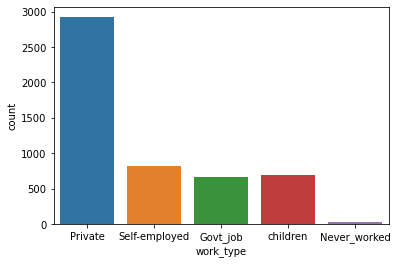

In [25]:
sns.countplot(data['work_type'], label="Count")
plt.show()

<AxesSubplot:xlabel='work_type', ylabel='count'>

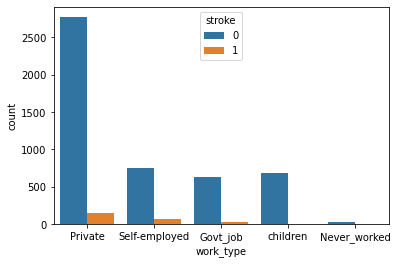

In [26]:
sns.countplot(data=data,x='work_type',hue='stroke')

Observation:

People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

# Residence_Type :

This attribute tells us whether what kind of residence the patient is. It can be Urban or Rural.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


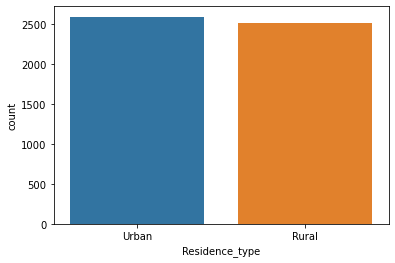

In [27]:
sns.countplot(data['Residence_type'], label="Count")
plt.show()

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

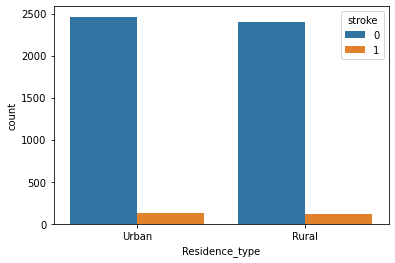

In [28]:
sns.countplot(data=data,x='Residence_type',hue='stroke')

#Observation:

This attribute is of no use. As we can see there not much difference in both attribute values. Maybe we have to discard it.

# Smoking_Status :
These attributes tell us whether or not the patient smokes. Smoking is injurious to health and may cause cardiac disease. Let’s see how it turns out in the case of our data.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


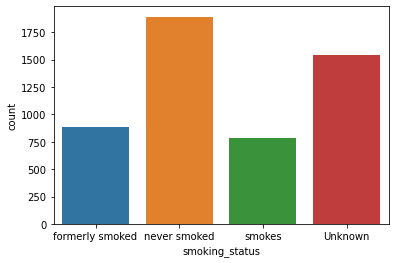

In [29]:
sns.countplot(data['smoking_status'], label="Count")
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

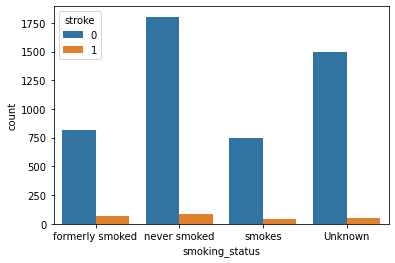

In [30]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

Observation:

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

# Average Glucose Level :
Tells about the average glucose level in the patient’s body. Let’s see whether this affects the chances of having a stroke

In [31]:
data['avg_glucose_level'].nunique()
# Number of unique values

3979

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

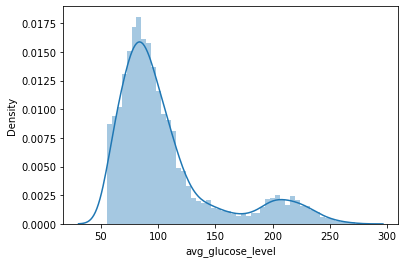

In [32]:
sns.distplot(data['avg_glucose_level'])
# Distribution of avg_glucose_level

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

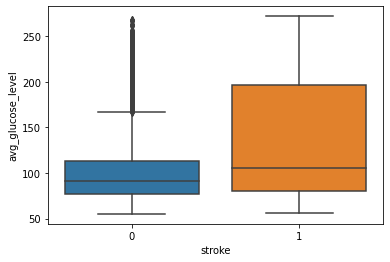

In [33]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')
# Avg_glucose_level and Stroke

Observation:

From this above graph, we can see that people having stroke have an average glucose level of more than 100.
There are some obvious outliers in patients who have no stroke but there are some chances of this being genuine records.

# Preproccessing

In [34]:
d=data["bmi"]
d

0       36.600000
1       29.065758
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    29.065758
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [35]:
d.isnull().sum()

0

# BMI :
Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. Let’s see how does it affect the chances of having a stroke.

In [36]:
male_mean_bmi = data[data["gender"]=="Male"]["bmi"].mean()
female_mean_bmi = data[data["gender"]=="Female"]["bmi"].mean()
print("male mean bmi: %1.5f " %male_mean_bmi)
print("female mean bmi: %1.5f " %female_mean_bmi)

male mean bmi: 28.64794 
female mean bmi: 29.06576 


In [37]:
#fill missing value with mean value
#df.bmi.fillna(value=df.bmi.mean(), inplace=True)
data.loc[(data["gender"]=="Male") & (data["bmi"].isnull()), "bmi"]= male_mean_bmi
data.loc[(data["gender"]=="Female") & (data["bmi"].isnull()), "bmi"]= female_mean_bmi

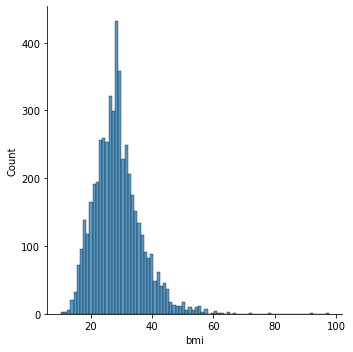

In [38]:
sns.displot(data['bmi'])
# Distribution of bmi

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

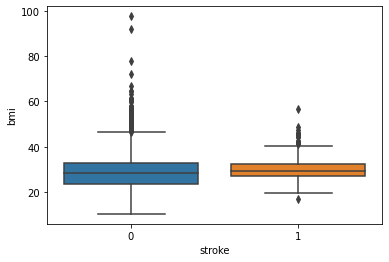

In [39]:
sns.boxplot(data=data,x='stroke',y='bmi')
# BMI with respect to Stroke

Observation:

There is as such no prominent observation of how does BMI affects the chances of having a stroke.

# Stroke :
Our target variable. It tells us whether patients have chances of stroke.

In [40]:
print('Unique Value\n',data['stroke'].unique())

Unique Value
 [1 0]


In [41]:
print('Value Counts\n',data['stroke'].value_counts())
# Returns Unique Value and its count

Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

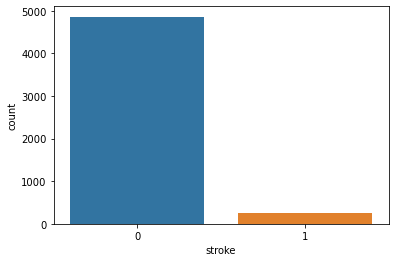

In [42]:
sns.countplot(data=data,x='stroke')
# Count Plot of Stroke

In [43]:
data.loc[data["gender"]=="Female"].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,29.065758,Unknown,1


In [44]:
data.loc[data["gender"]=="Male"].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.647936,Unknown,1


In [45]:
# Categorical columns in the training data
object_cols = [col for col in data.columns if data[col].dtype == "object"]
print('Categorical columns that will be ordinal encoded:', object_cols)

Categorical columns that will be ordinal encoded: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [46]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: data[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))
# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('ever_married', 2),
 ('Residence_type', 2),
 ('gender', 3),
 ('smoking_status', 4),
 ('work_type', 5)]

In [47]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB

In [48]:
ordinal_encoder=OrdinalEncoder()
data[object_cols]=ordinal_encoder.fit_transform(data[object_cols])

In [49]:
target=data["stroke"]
target


0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [50]:
X = data.drop('stroke', axis=1)
y = data['stroke']

# Balancing Dataset
As we know, our dataset is imbalanced. So let’s balance our data. We are going to use SMOTE method for this. It will populate our data with records similar to our minor class. Usually, we perform this on the whole dataset but as we have very fewer records of minor class I am applying it on both train and test data. Earlier I tried doing it by just resampling data of the training dataset but it didn’t perform that well so I tried this approach and got a good result.

In [51]:
X = data.drop('stroke', axis=1)
y = data['stroke']

In [52]:
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


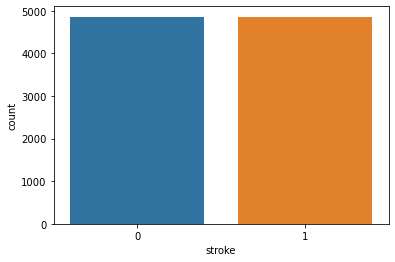

In [53]:
sns.countplot(y_SMOTE, label="Count")
plt.show()

# Model Creation
Let’s start with creating models. I have created few models namely,Decision tree, Random Forest Classifier,KNN, and Naive Bayes model and scv model. 

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [76]:
#building decision tree model
decision_tree = dtc(random_state=0)
decision_tree.fit(X_SMOTE, y_SMOTE)

#building Random Forest model
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X_SMOTE, y_SMOTE)

#building KNN model
knn = KNeighborsClassifier()
knn.fit(X_SMOTE, y_SMOTE)

#building Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_SMOTE, y_SMOTE)



GaussianNB()

# Model Evaluation

In [77]:
#evaluation decision tree model
predict = cross_val_predict(estimator = decision_tree, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      4861
           1       0.93      0.94      0.94      4861

    accuracy                           0.93      9722
   macro avg       0.93      0.93      0.93      9722
weighted avg       0.93      0.93      0.93      9722



In [78]:
#evaluation Random Forest model
predict = cross_val_predict(estimator = random_forest, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      4861
           1       0.99      0.95      0.97      4861

    accuracy                           0.97      9722
   macro avg       0.97      0.97      0.97      9722
weighted avg       0.97      0.97      0.97      9722



In [79]:
#evaluation KNN model
predict = cross_val_predict(estimator = knn, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      4861
           1       0.77      0.86      0.81      4861

    accuracy                           0.80      9722
   macro avg       0.80      0.80      0.80      9722
weighted avg       0.80      0.80      0.80      9722



In [80]:
#evaluation Naive Bayes model
predict = cross_val_predict(estimator = gnb, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.65      0.76      4861
           1       0.73      0.93      0.82      4861

    accuracy                           0.79      9722
   macro avg       0.81      0.79      0.79      9722
weighted avg       0.81      0.79      0.79      9722



we will check our features using SelectKBest and F_Classif. :-

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif

In [82]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)


,Attribute,Score
2,age,326.916568
4,heart_disease,94.698406
8,avg_glucose_level,90.503870
3,hypertension,84.953542
5,ever_married,60.667230
9,bmi,7.730817
6,work_type,5.340019
10,smoking_status,4.043033
7,Residence_type,1.220842
1,gender,0.407266


In the above result, we can see that age is a highly correlated variable and then it gets decreasing. I am keeping the threshold score as 50. Resulting in the same features we got in the heatmap.

In [83]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

2                  age
3         hypertension
4        heart_disease
5         ever_married
8    avg_glucose_level
Name: Attribute, dtype: object


<AxesSubplot:>

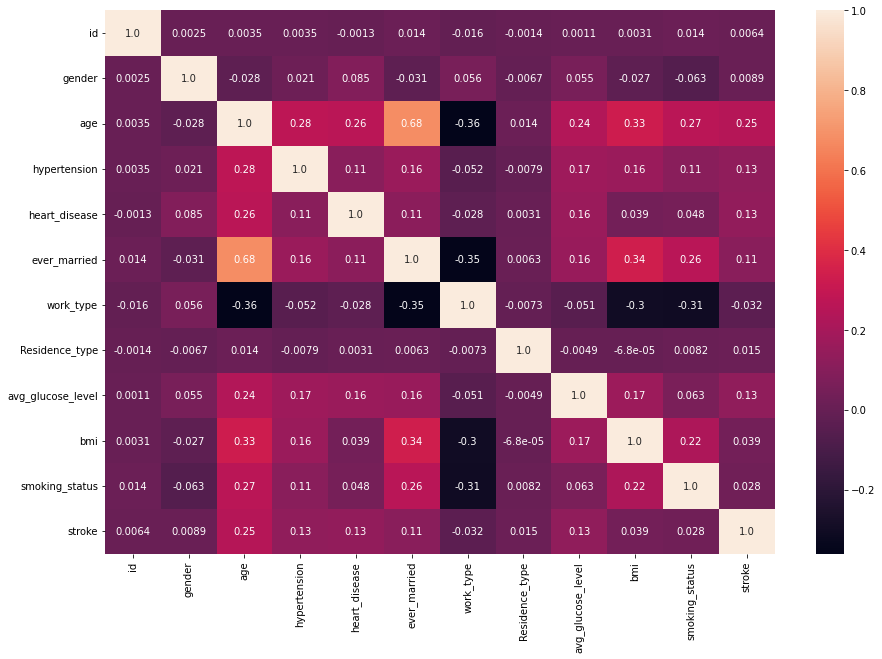

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

Observation:

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.


# Closure
So in this project, we saw some of the factors that might result in strokes. Where Age was highly correlated followed by hypertension, heart disease, avg glucose level, and ever married.
Random forest model  was a knight who performed well with 97 of accuracy. There are outliers in some variable, reason behind why I kept it as it is because these things are either depends on other factors and there are possibilities of having such kind of records. For example, BMI can be high and still no stroke as a person is young or he does not have any heart disease.